# Numpy => The python numerical library

numpy array => basically the main datastructure of numpy

originally used for a collection of scientific libraries (scipy)

it comes with lots of functionalities => the api is huge

In [ ]:
from __future__ import annotations
# from solutions import * 
# this is bad pratice do not do this unless you want to hide stuff

### Implement a function to read the data from rain.csv

In [ ]:
def read_rain_prcp() -> list[float]: # this is a typing annotation super usefull for clarity
    # the rain file path is ../data/rain.csv
    # read the second column in the rain file
    # use list, string manipulation, indexing, type conversion in some loop to get the data
    # replace NA with 0
    ...
    return ...


In [ ]:
#assert all(prcp == solution for prcp, solution in zip(read_rain_prcp(),read_rain_prcp_sol()))
prcp = read_rain_prcp()

### Implement a function to extract the average precipitation for all the data we got from the file

In [ ]:
def mean_py(nums: list[float]) -> float:
    # use builtins inside this function
    m = ...
    return m

def naive_mean(nums: list[float]) -> float:
    # only use basic language constructs like loops and additions, divisions
    total = ...
    counter = ...
    ...
    return total / counter


In [ ]:
# assert mean_py(prcp) == mean_py_sol(prcp)
# assert naive_mean(prcp) == naive_mean_sol(prcp)

In [ ]:
%%timeit
mean_py(prcp)

In [ ]:
%%timeit
naive_mean(prcp)

In [ ]:
from statistics import mean

In [ ]:
%%timeit
mean(prcp)

In [ ]:
import numpy as np
arr = np.array(prcp)

In [ ]:
%%timeit
np.mean(arr)

In [ ]:
%%timeit
np.mean(prcp)

In [ ]:
from dis import dis
dis(naive_mean)

In [ ]:
dis(mean_py)

### Challenge for advanced users => create a timer function that times code being passed to it

*remember: the function should be able to call another function with about any number of arguments, it should return the results of the function being passed to it*

`hint` : look up *args, **kwargs and decorators

In [ ]:
from typing import Callable, TypeVar
from functools import wraps
from time import perf_counter, sleep

T = TypeVar("T")
def timer(func: Callable[..., T]) -> Callable[..., T]:
    ...
    return func

def wait(num: int, seconds: int) -> int:
    sleep(seconds)
    return num + 1


In [ ]:
wait = timer(wait)

## Numpy

    - what it do
    - how it be


In [ ]:
arr = np.array([i for i in range(25)], dtype=np.uint8)

In [ ]:
print(arr.shape)
print(arr.ndim)
print(arr.sum())
print(arr.dtype)

In [ ]:
print(np.random)
print(np.linalg)
np.max, np.sum, np.where, np.min, np.add, np.multiply, np.cos, np.arange, np.linspace


### Types ? How does that work inside a python flexible environment ?

In [ ]:
np.linspace(1,10,3)

In [ ]:
arr = np.array(prcp, dtype=np.float16)

In [ ]:
arr.mean()
arr.std()


In [ ]:
# watchout for overflows / wrap around
np.uint8(300)

### Slicing

*Just like many other iterables, arrays support complex indexing*

```arr[0, 0]``` to get the first element in a 2d array

In [ ]:
arr[::-1]
"hello world"[::-1]



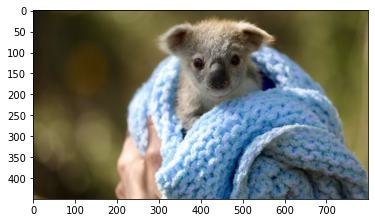

In [6]:
from matplotlib import image
import matplotlib.pyplot as plt

koala :np.ndarray = image.imread("../data/koala.jpeg")

plt.imshow(koala)
plt.show()

### Implement a function to zoom on the lower right quarter of the image 

In [ ]:
def zoom(image: np.ndarray) -> np.ndarray:
    """shows lower right quarter, returns sliced matrix"""
    focus : np.ndarray = ...
    return focus

sliced = zoom(koala)

In [ ]:
assert (sliced == zoom_sol(koala)).all()
plt.imshow(sliced)

### Create a random noise matrix with the same shape as the koala matrix, max value of each item should be 70

    - show the result of the image after adding the random noise
    - show the result of the image after substracting the random noise

In [ ]:
noise = ...

In [ ]:
plt.imshow(noise - koala)

In [ ]:
plt.imshow(noise + koala)

### polarizing

select the pixels that are:

    - too bright (sum of their values > 255 * 0.8 * 3): set them to white
    - too dark (sum of their values < 255 * 0.2 * 3): set them to black

In [ ]:
plt.imshow(koala)

In [ ]:
def polarize(image:np.ndarray)-> np.ndarray:
    """polarize the image"""
    altered = image.copy()
    ...
    return altered

polarized = polarize(koala)

In [ ]:
# assert (polarized == polarize_sol(koala)).all()
# plt.imshow(polarized);plt.show()

### blue koala and other cute things

Set all the RGB channels other than blue to be black this way we'll have an image with only blue pixels

In [ ]:
def blue(image: np.ndarray) -> np.ndarray:
    """blacks out Red and Green channels of image"""
    other = image.copy()
    ...
    return other

b_k = blue(koala)

In [ ]:
# assert (b_k == blue_sol(koala)).all()
# plt.imshow(b_k);plt.show()

In [ ]:
def negative(image:np.ndarray)->np.ndarray:
    """output the negative of the image"""
    return ...

neg = negative(koala)

In [ ]:
# assert (neg == negative_sol(koala)).all()
# plt.imshow(neg);plt.show()

In [11]:
def rotate(image:np.ndarray)->np.ndarray:
    """rotate the image 90 degrees"""
    return ...

rotated = rotate(koala)

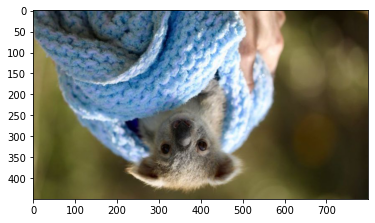

In [12]:
#assert (rotated == rotated_sol(koala)).all()
plt.imshow(rotated);plt.show()

In [ ]:
def blur(image:np.ndarray, steps:int) -> np.ndarray:
    """ blur the image by setting pixels to a local average value

    we first divide the image into N pieces and average out the color of each piece
    we then set those pieces to the average color
    """
    x_shape = image.shape[0]
    x_step = x_shape // steps
    y_shape = image.shape[1]
    y_step = y_shape // steps

    copy = image.copy()
    for i in range(0, ..., x_step):
        for j in range(0, ..., y_step):
            sub = image[i:..., :...+ y_step,:]
            copy[...] = ...
    return copy

In [ ]:
# assert (blur(koala, 2) == blur_sol(koala, 2)).all() 
# plt.imshow(blur(koala, 10));plt.show()

## Back to the RAIN

In [ ]:
rain = np.array(read_rain_prcp(), dtype=np.float16)

def read_temp_data() -> tuple[np.ndarray,np.ndarray]:
    ...
    return ..., ...

max_t, min_t = read_temp_data()

#### Compute the average temperature for each day

In [ ]:
avg_tmp = ...

#### Compute the correlation coefficient between

    - max_t & min_t
    - rain & max_t
    - rain & min_t
    - rain & max_t - min_t


In [ ]:
print(np.corrcoef(max_t, min_t), end="\n"+"-"*10+"\n")
print(np.corrcoef(rain, max_t), end="\n"+"-"*10+"\n")
print(np.corrcoef(rain, min_t), end="\n"+"-"*10+"\n")
print(np.corrcoef(rain, max_t-min_t), end="\n"+"-"*10+"\n")

#### Compute the moving rain fall average

In [ ]:
def plot_rain(data: np.ndarray) -> None:
    plt.figure(figsize=(10, 5))
    plt.title("Rain Fall")
    plt.xlabel("date")
    plt.ylabel("ml / m2")
    plt.plot(data)
    plt.show()

plot_rain(rain)

In [ ]:
def moving_avg(array: np.ndarray, window:int) -> np.ndarray:
    """ create a new array with the same size as ass given one
        iterate over the old one and fill the new one with the average of the old array window going forward
        hint: use indexing take advantage of the fact that numpy does not error out when slicing over bigger indices
        preallocate with zeros_like, ones_like
    """
    arr = np...(array)
    ...
    return arr

mva = moving_avg(rain, 365)

In [ ]:
assert (mva == moving_avg(rain, 365)).all()
plot_rain(mva)

Some more maths basics are

In [ ]:
rain.T

In [ ]:
rain.dot(rain.T)

In [ ]:
rain.std()